<a href="https://colab.research.google.com/github/Crystalisatechie/fashion-sales-eda/blob/main/TS_fashion_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# 1. Setup, Libraries, and Data Loading
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# Set visual styles for plots
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 6)

In [49]:
# --- Load the Data ---
file_path = "Fashion_sales_data.xlsx"
try:
    # Use pd.read_excel() for your XLSX file
    df = pd.read_excel(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please ensure it is uploaded to your Colab session.")
    raise

Data loaded successfully.


In [50]:
# Quick inspection of the loaded data
print("\n--- Data Inspection ---")
print("First 5 rows of the data:")
print(df.head())


--- Data Inspection ---
First 5 rows of the data:
   Product_ID   Product_Name   Category   Color  Price  Popularity  Season  \
0           1      Bold Shoe      Shoes  Purple   7628         235  Winter   
1           2     Bold Skirt     Skirts   White  14985         487  Spring   
2           3   Elegant Shoe      Shoes  Purple  12765         523  Winter   
3           4  Bold SKZ-Merc  SKZ-Merch  Silver  10806         434  Winter   
4           5   Elegant Shoe      Shoes   Black   2719         267  Winter   

   Rating Material  
0     4.1    Denim  
1     4.9    Satin  
2     4.8   Canvas  
3     4.9  Leather  
4     4.2     Wool  


####Derived Metric: Sales Performance

In [51]:
# 1. Derived metric
df['Sales_Performance'] = df['Price'] * df['Popularity']
print("New column 'Sales_Performance' (Price * Popularity) added to DataFrame.")
print("\nFirst 5 rows with new metric:")
print(df[['Price', 'Popularity', 'Sales_Performance']].head())

New column 'Sales_Performance' (Price * Popularity) added to DataFrame.

First 5 rows with new metric:
   Price  Popularity  Sales_Performance
0   7628         235            1792580
1  14985         487            7297695
2  12765         523            6676095
3  10806         434            4689804
4   2719         267             725973


####Visualize Category Distribution


--- Generating Category Distribution Plot ---


/tmp/ipython-input-2380598931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


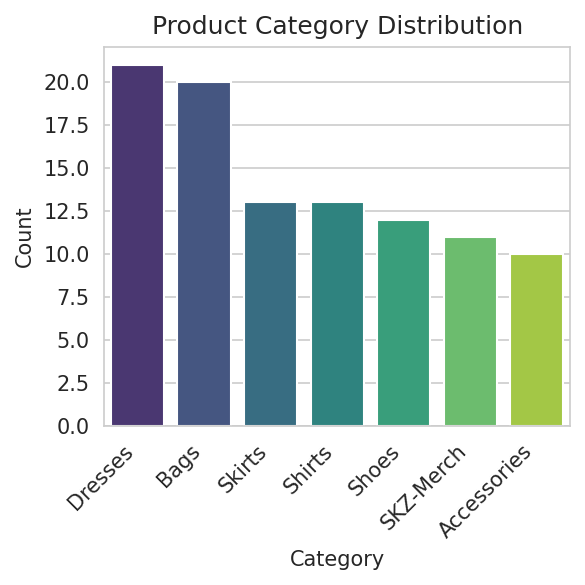

In [52]:
# 2. Visualize Category Distribution
print("\n--- Generating Category Distribution Plot ---")
plt.figure(figsize=(4, 4))
category_counts = df['Category'].value_counts().sort_values(ascending=False)
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#####Price Distribution


--- Generating Price Distribution Plot ---


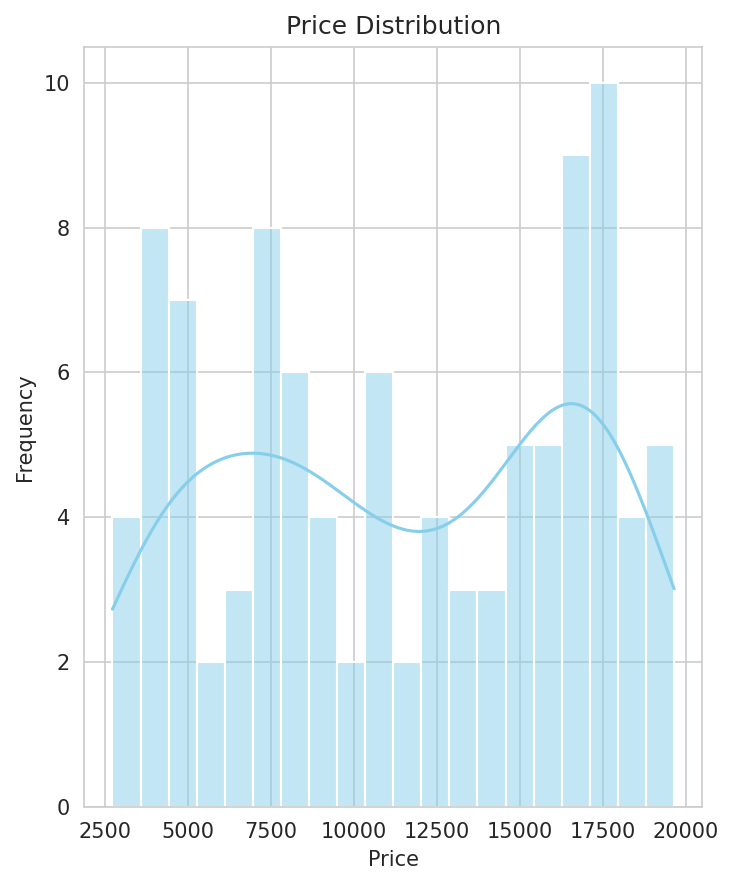

In [53]:
# 3. Price Distribution
print("\n--- Generating Price Distribution Plot ---")
plt.figure(figsize=(5, 6))
sns.histplot(df['Price'], kde=True, bins=20, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

####Average Price by Category


--- Generating Average Price by Category Plot ---


/tmp/ipython-input-1098456030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette='magma')


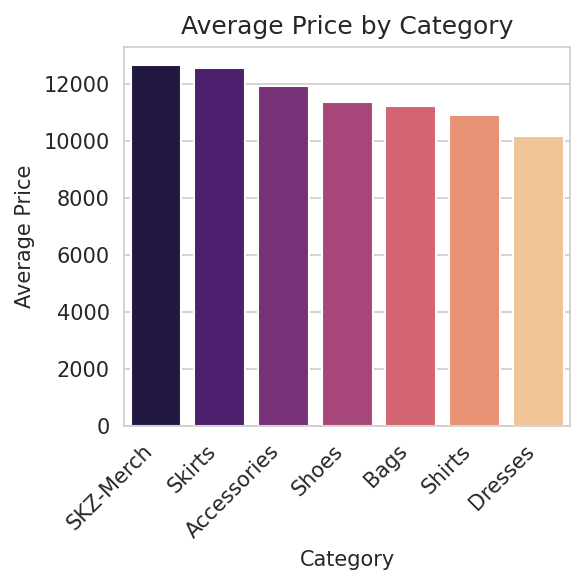

In [54]:
# 4. Average Price by Category
print("\n--- Generating Average Price by Category Plot ---")
avg_price_by_category = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(4, 4))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette='magma')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#####Ratings by Category


--- Generating Average Ratings by Category Plot ---


/tmp/ipython-input-2473047421.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='plasma')


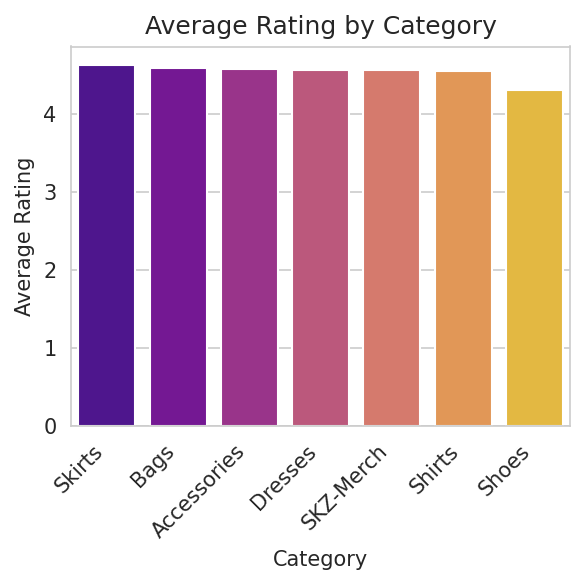

In [55]:
# 5. Average Ratings by Category
print("\n--- Generating Average Ratings by Category Plot ---")
avg_rating_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(4, 4))
sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='plasma')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####Popularity by Trend (Season)


--- Generating Average Popularity by Season Plot ---


/tmp/ipython-input-3003888066.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_popularity_by_season.index, y=avg_popularity_by_season.values, palette='cividis')


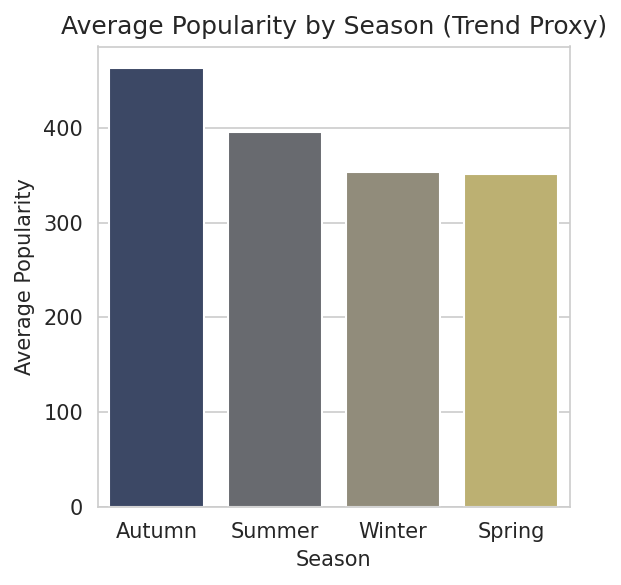

In [56]:
# 6. Popularity by Trend (Season)
print("\n--- Generating Average Popularity by Season Plot ---")
avg_popularity_by_season = df.groupby('Season')['Popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(4, 4))
sns.barplot(x=avg_popularity_by_season.index, y=avg_popularity_by_season.values, palette='cividis')
plt.title('Average Popularity by Season (Trend Proxy)')
plt.xlabel('Season')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

####Bivariate Analysis: Price vs. Popularity

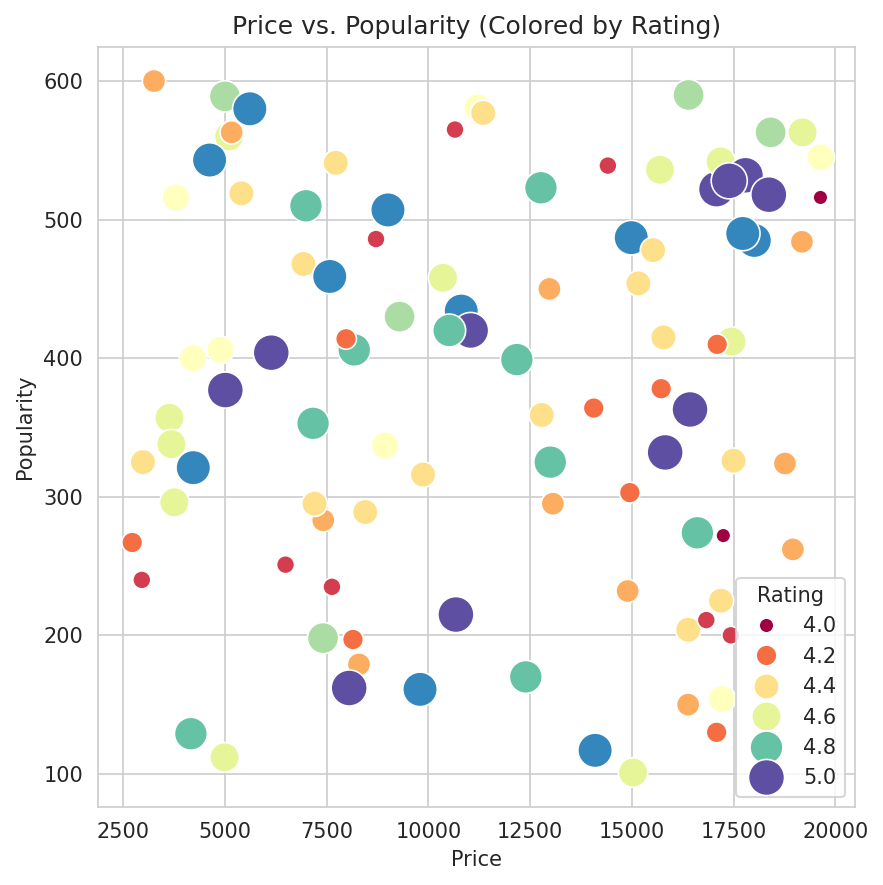

In [57]:
#7. print("\n--- Generating Price vs. Popularity Scatter Plot ---")
plt.figure(figsize=(6, 6))

# Use Rating as hue or size to add a third dimension (multivariate element)
sns.scatterplot(x='Price', y='Popularity', hue='Rating', size='Rating', data=df, palette='Spectral', sizes=(50, 300))

plt.title('Price vs. Popularity (Colored by Rating)')
plt.xlabel('Price')
plt.ylabel('Popularity')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

####Segmentation: Sales Performance by Season


--- Generating Sales Performance by Season Plot ---


/tmp/ipython-input-1848554802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values, palette='mako')


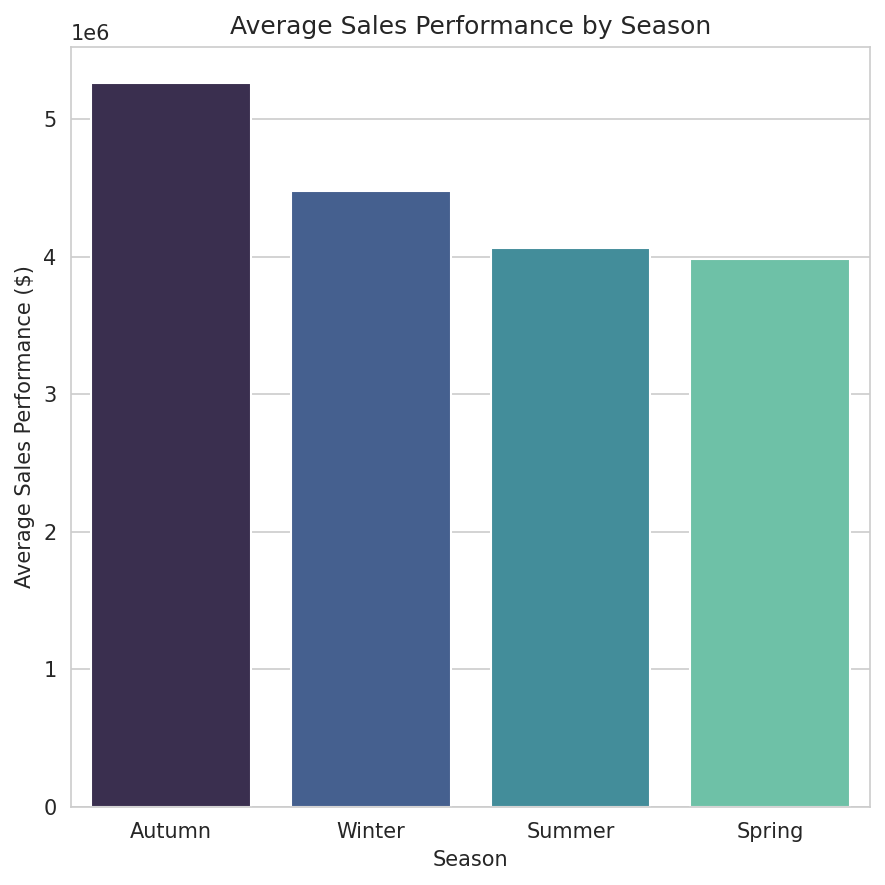

In [58]:
print("\n--- Generating Sales Performance by Season Plot ---")

# Group by Season and calculate the mean of the new Sales_Performance metric
avg_sales_by_season = df.groupby('Season')['Sales_Performance'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 6))
sns.barplot(x=avg_sales_by_season.index, y=avg_sales_by_season.values, palette='mako')
plt.title('Average Sales Performance by Season')
plt.xlabel('Season')
plt.ylabel('Average Sales Performance ($)')
plt.tight_layout()
plt.show()

####Outlier Analysis: Price Range by Category


--- Generating Price Box Plot by Category ---


/tmp/ipython-input-650944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=df, order=category_order, palette='Set2')


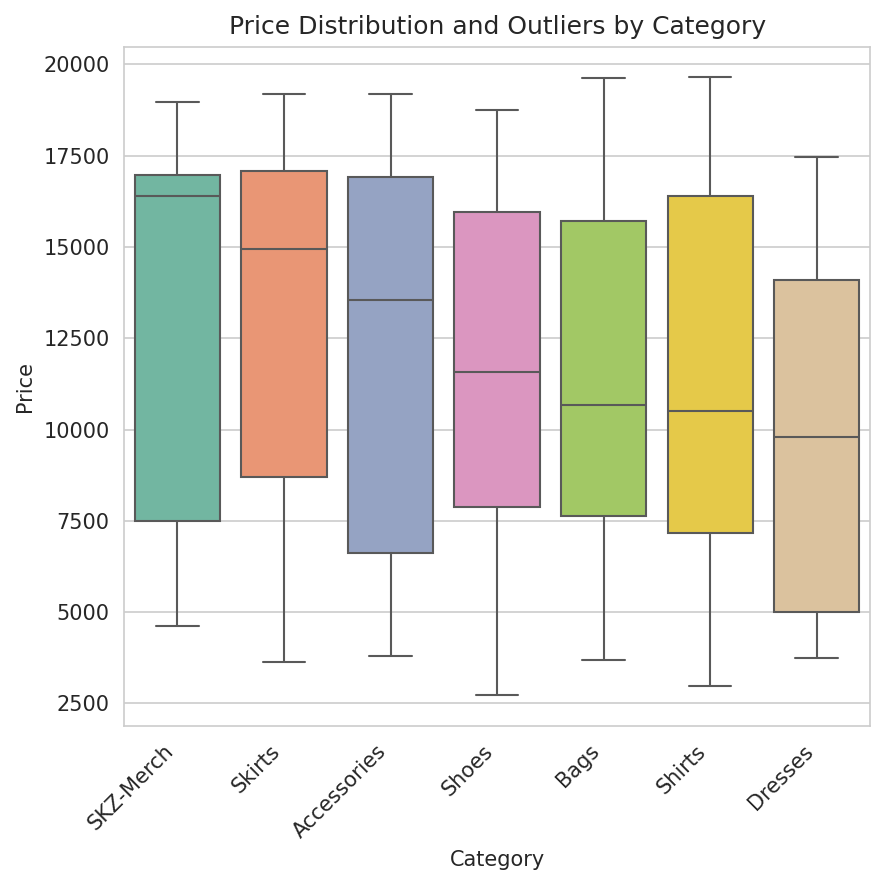

In [59]:
print("\n--- Generating Price Box Plot by Category ---")

plt.figure(figsize=(6, 6))
# Use order to ensure categories appear in a readable (or sorted by median) order
category_order = df.groupby('Category')['Price'].median().sort_values(ascending=False).index
sns.boxplot(x='Category', y='Price', data=df, order=category_order, palette='Set2')

plt.title('Price Distribution and Outliers by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

####Correlation Heatmap


--- Generating Correlation Heatmap ---


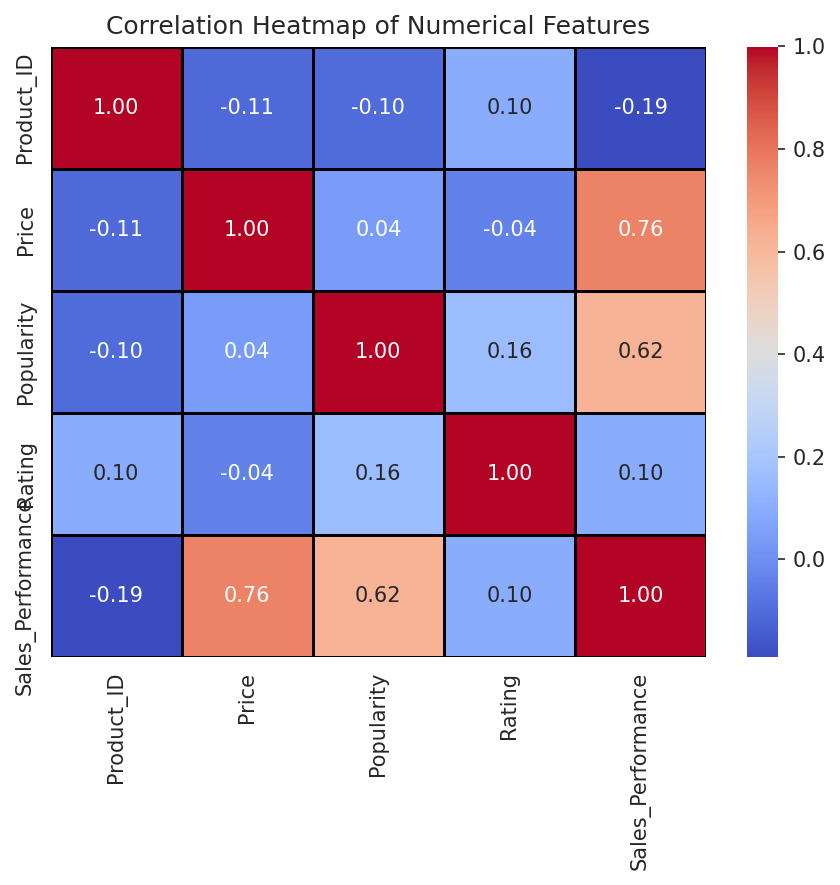

In [60]:
# 7. Correlation Heatmap
print("\n--- Generating Correlation Heatmap ---")
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [63]:
# Define file paths
input_file = "Fashion_sales_data.xlsx"
# output_file = "Fashion_sales_data_cleaned.csv" # Removed as we are not saving to CSV

# 1. Load the original data
try:
    # Use pd.read_excel() for your XLSX file
    df = pd.read_excel(input_file)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"Error: Input file {input_file} not found. Please ensure it is uploaded to your Colab session.")
    raise

# 2. Add the derived metric: Sales_Performance = Price * Popularity
if 'Sales_Performance' not in df.columns:
    df['Sales_Performance'] = df['Price'] * df['Popularity']
    print("New column 'Sales_Performance' (Price * Popularity) added to DataFrame.")
# 3. Removed the code to save to CSV as it was causing the error.
# df.to_csv(output_file, index=False)

Data loaded successfully.
New column 'Sales_Performance' (Price * Popularity) added to DataFrame.
